# **Pembelajaran Mesin: Tugas Besar 1**

Wahyu Hauzan Rafi
IF-43-05
1301191313

## **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import random

## **Import Dataset**

In [79]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/whauzan/K-Means-Clustering-Machine-Learning-Task-1/main/dataset/raw/kendaraan_train.csv').drop('id', axis=1)
df_raw.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [80]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


In [81]:
df_raw.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## **Data Preprocessing**

### **Drop Categorical Data**

In [82]:
df_nonCategorical = df_raw.drop(axis=1, columns=['Jenis_Kelamin', 'SIM', 'Sudah_Asuransi' ,'Umur_Kendaraan', 'Kendaraan_Rusak', 'Tertarik'])
df_nonCategorical.head()

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,33.0,28029.0,152.0,97.0
1,48.0,39.0,25800.0,29.0,158.0
2,21.0,46.0,32733.0,160.0,119.0
3,58.0,48.0,2630.0,124.0,63.0
4,50.0,35.0,34857.0,88.0,194.0


In [83]:
len(df_nonCategorical)

285831

### **Check If There's Empty Data**

In [84]:
df_nonCategorical.isna().sum()

Umur                 14214
Kode_Daerah          14306
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

### **Check Empty Data's Percentage Over The Raw Data**

<AxesSubplot:>

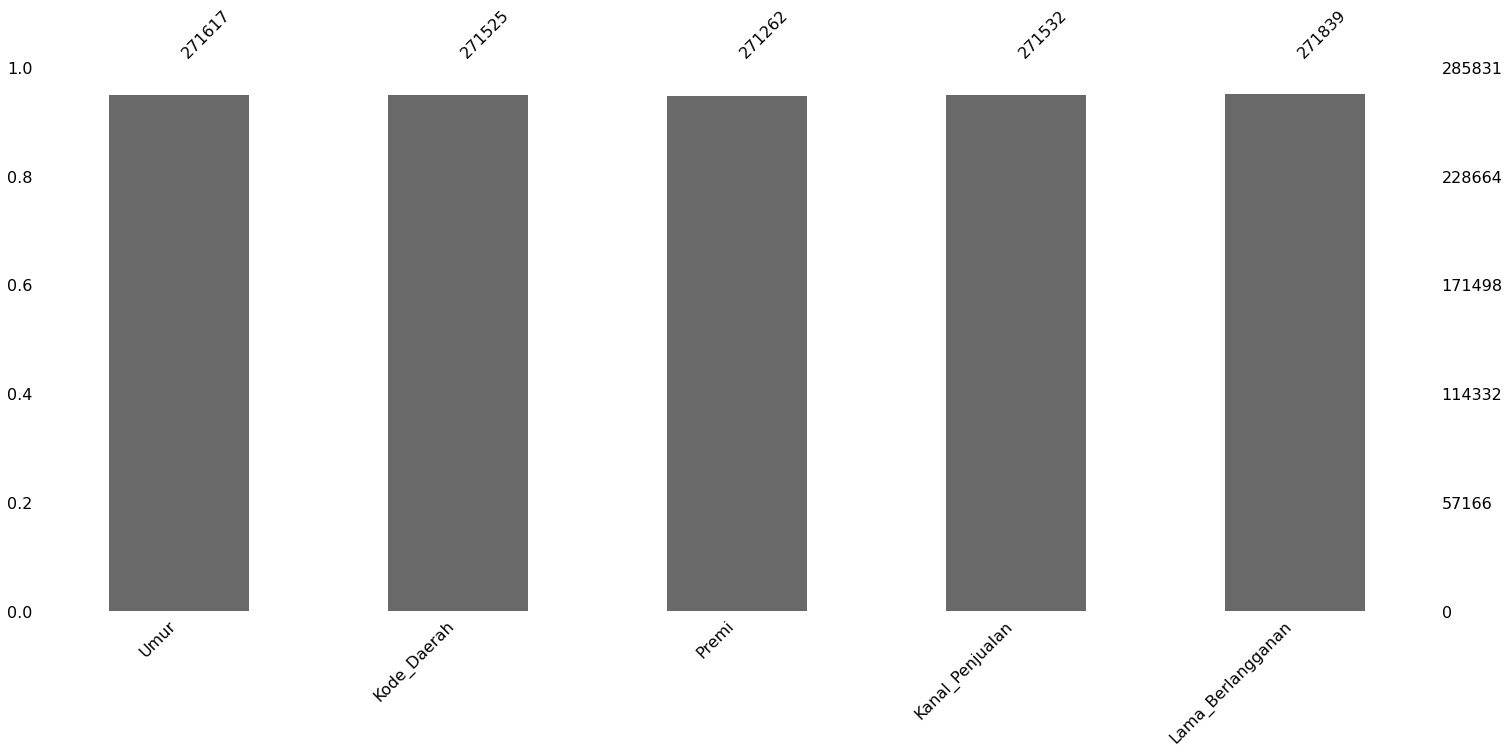

In [85]:
missingno.bar(df_nonCategorical)

In [86]:
df_nonCategorical_drop = df_nonCategorical.dropna(how='any')
dropping_percentage = 100 - (len(df_nonCategorical_drop)/len(df_raw) * 100)
print("Empty Data's Percentage: ", dropping_percentage)

Empty Data's Percentage:  22.611963013109147


### **Fill Empty Data**

In [41]:
# df_nonCategorical['Umur'] = df_nonCategorical['Umur'].replace(np.NaN, df_nonCategorical['Umur'].mean())
# df_nonCategorical['Kode_Daerah'] = df_nonCategorical['Kode_Daerah'].replace(np.NaN, df_nonCategorical['Kode_Daerah'].mode()[0])
# df_nonCategorical['Premi'] = df_nonCategorical['Premi'].replace(np.NaN, df_nonCategorical['Premi'].mean())
# df_nonCategorical['Kanal_Penjualan'] = df_nonCategorical['Kanal_Penjualan'].replace(np.NaN, df_nonCategorical['Kanal_Penjualan'].mode()[0])
# df_nonCategorical['Lama_Berlangganan'] = df_nonCategorical['Lama_Berlangganan'].replace(np.NaN, df_nonCategorical['Lama_Berlangganan'].mean())
# df_nonCategorical.head()


### **Check If there's still Empty Data**

In [87]:
df_nonCategorical_drop.isna().sum()

Umur                 0
Kode_Daerah          0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

### **Checking Outlier**

(<AxesSubplot:title={'center':'Lama Berlangganan'}>,
 {'whiskers': [<matplotlib.lines.Line2D at 0x16162057a00>,
  'caps': [<matplotlib.lines.Line2D at 0x161620773d0>,
  'boxes': [<matplotlib.lines.Line2D at 0x16162057f10>],
  'medians': [<matplotlib.lines.Line2D at 0x16162077790>],
  'fliers': [<matplotlib.lines.Line2D at 0x1615fb5d130>],
  'means': []},
 Text(0.5, 1.0, 'Lama Berlangganan'))

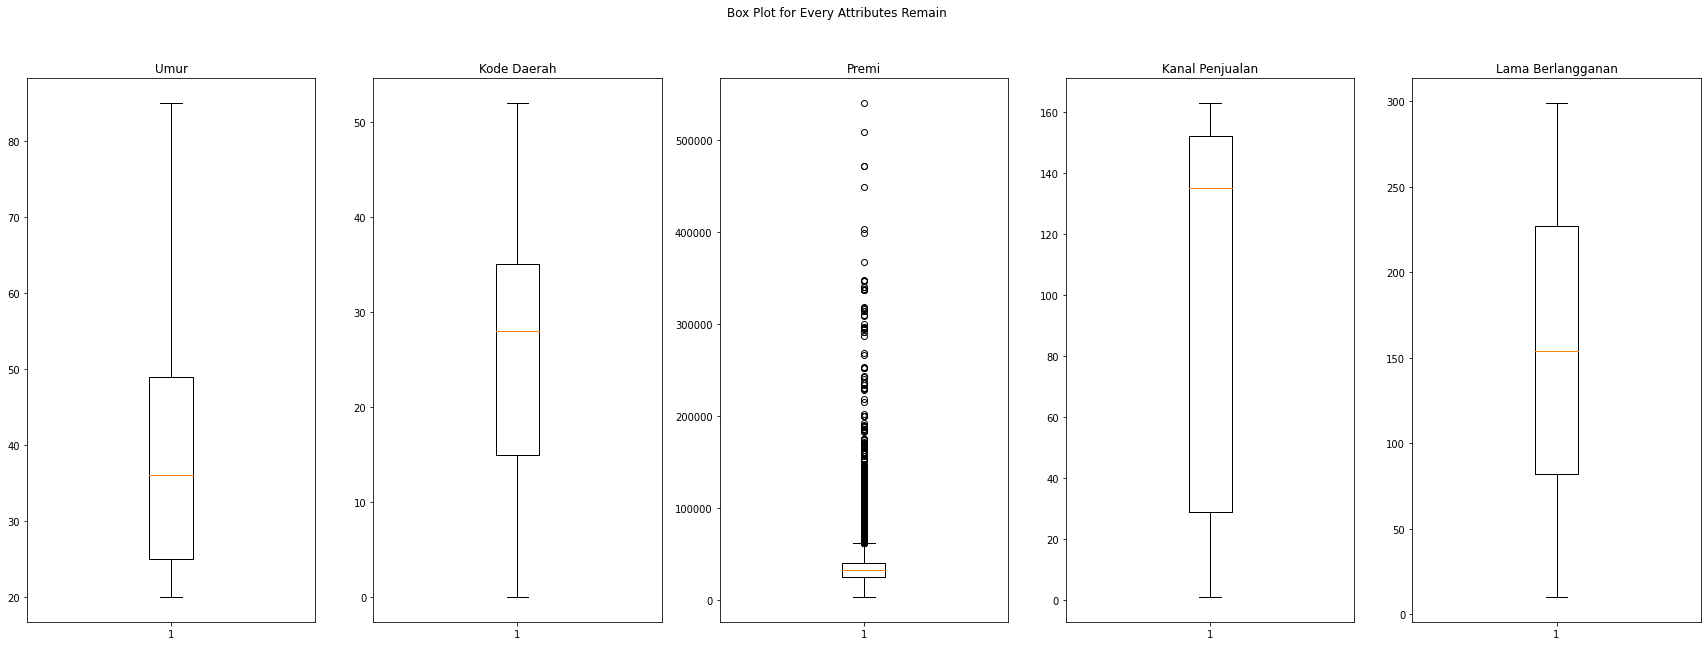

In [88]:
fig = plt.figure(figsize=(30, 10))
fig.suptitle('Box Plot for Every Attributes Remain')
fig.add_subplot(1,5,1), plt.boxplot(df_nonCategorical_drop['Umur']), plt.title('Umur')
fig.add_subplot(1,5,2), plt.boxplot(df_nonCategorical_drop['Kode_Daerah']), plt.title('Kode Daerah')
fig.add_subplot(1,5,3), plt.boxplot(df_nonCategorical_drop['Premi']), plt.title('Premi')
fig.add_subplot(1,5,4), plt.boxplot(df_nonCategorical_drop['Kanal_Penjualan']), plt.title('Kanal Penjualan')
fig.add_subplot(1,5,5), plt.boxplot(df_nonCategorical_drop['Lama_Berlangganan']), plt.title('Lama Berlangganan')

### **Drop Outlier Data in Premi With IQR Method**

In [89]:
Q1 = df_nonCategorical_drop.Premi.quantile(0.25)
Q3 = df_nonCategorical_drop.Premi.quantile(0.75)
IQR = Q3 - Q1

LB = Q1 - (IQR * 1.5)
UB = Q3 + (IQR * 1.5)

df_nonCategorical_drop.loc[df_nonCategorical_drop['Premi'] > UB, "Premi"] = UB
df_nonCategorical_drop.loc[df_nonCategorical_drop['Premi'] < LB, "Premi"] = LB

df_final = df_nonCategorical_drop.copy()

C:\Users\WHAUZAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\WHAUZAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


(<AxesSubplot:title={'center':'Lama Berlangganan'}>,
 {'whiskers': [<matplotlib.lines.Line2D at 0x1614f871d30>,
  'caps': [<matplotlib.lines.Line2D at 0x1614f8713d0>,
  'boxes': [<matplotlib.lines.Line2D at 0x1614f8717f0>],
  'medians': [<matplotlib.lines.Line2D at 0x1614f855a90>],
  'fliers': [<matplotlib.lines.Line2D at 0x1614f8558b0>],
  'means': []},
 Text(0.5, 1.0, 'Lama Berlangganan'))

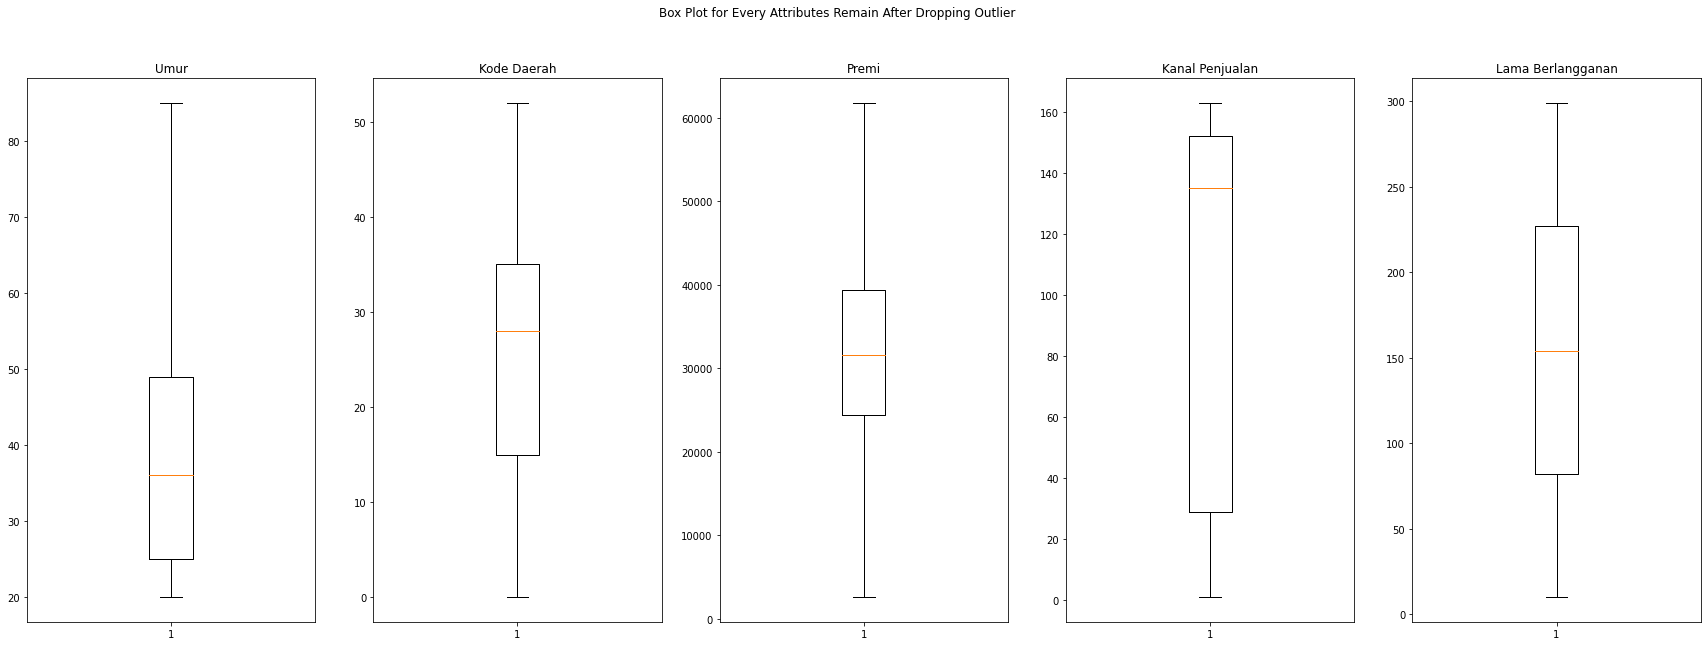

In [90]:
fig = plt.figure(figsize=(30, 10))
fig.suptitle('Box Plot for Every Attributes Remain After Dropping Outlier')
fig.add_subplot(1,5,1), plt.boxplot(df_final['Umur']), plt.title('Umur')
fig.add_subplot(1,5,2), plt.boxplot(df_final['Kode_Daerah']), plt.title('Kode Daerah')
fig.add_subplot(1,5,3), plt.boxplot(df_final['Premi']), plt.title('Premi')
fig.add_subplot(1,5,4), plt.boxplot(df_final['Kanal_Penjualan']), plt.title('Kanal Penjualan')
fig.add_subplot(1,5,5), plt.boxplot(df_final['Lama_Berlangganan']), plt.title('Lama Berlangganan')

### **Saving Clean Dataset**
You don't need to run this cell. It's just saving our clean dataframe to csv or xlsx file

In [122]:
df_final.to_csv('../dataset/clean/kendaraan_train.csv', header=True, index=True)
df_final.to_excel('../dataset/clean/kendaraan_train.xlsx', header=True, index=True)

### **Feature Selection**

C:\Users\WHAUZAN\AppData\Local\Temp/ipykernel_16844/460742179.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_final.corr(), dtype=np.bool))


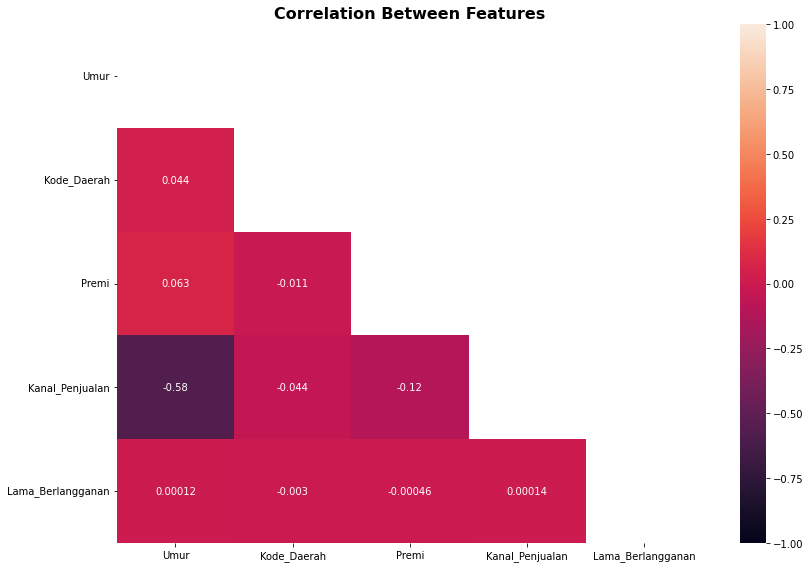

In [91]:
fig, ax = plt.subplots(figsize=(12, 8))

mask = np.triu(np.ones_like(df_final.corr(), dtype=np.bool))

heatmap = sns.heatmap(df_final.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

plt.title("Correlation Between Features", loc='center', fontsize=16, fontweight='bold')  
plt.tight_layout()
plt.show()

In [61]:
df_final.corr()

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
Umur,1.000000,0.044031,0.063210,-0.577513,0.000117
Kode_Daerah,0.044031,1.000000,-0.011436,-0.043869,-0.003012
Premi,0.063210,-0.011436,1.000000,-0.116089,-0.000463
Kanal_Penjualan,-0.577513,-0.043869,-0.116089,1.000000,0.000141
Lama_Berlangganan,0.000117,-0.003012,-0.000463,0.000141,1.000000


## **Modelling**

In [119]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KMeans:
  training_arr = None
  point = None
  inertia = None
  
  def __init__(self, df: pd.DataFrame):
    '''
    This initial constructor is used to prepare the dataframe to be trained.
    Make sure the column named id or similar has been dropped and is not included in the dataframe.
    '''
    print("K-Means will be determined by the attributes below:")
    print(f"[ {df.columns[0]}, {df.columns[1]} ]", end='\n')
    self.training_arr = df.to_numpy()
    
  def fit_predict(self, k_num:int = 3, max_step:int = 500) -> np.array:
    '''
    This method will predict the cluster result based on the dataframe that we already prepared.
    The centroid of each cluster will be stored in variable point.
    '''
    # Setting up cluster array for every record
    cluster = np.zeros(len(self.training_arr))
    
    # normalize data
    data = self.__normalize_data__(self.training_arr)
    
    # Initialize centroid using KMeans++
    point = self.__initialize_centroids__(data, k_num)
        
    # Setup convergence and counter
    convergence = False
    step = 0
        
    while not convergence and (step < max_step):
      initial_point = point
      distance = self.__calculate_distance__(data, point)
      cluster = self.__clustering__(distance)
      new_point = self.__point_normalization__(data, point, cluster)
      convergence = self.__convergence_check__(initial_point, new_point)

      if convergence:
        point = new_point
        print("It's convergence!")
      else:
        point = new_point
        step += 1
        self.inertia = self.__calculate_inertia__(data, cluster, point)
        print(f"STEP: {step}, INERTIA: {self.inertia}")
      
    self.point = self.__denormalize_point__(point, self.training_arr)
    return cluster
  
  def __normalize_data__(self, data:np.array) -> np.array:
    '''
    This method is used to normalize data using min-max scaling from scikit-learn module.
    '''
    data = data.copy()
    for i in range(len(data[0])):
      col_arr = data[:,i]
      minmax = MinMaxScaler()
      normalize = minmax.fit_transform(col_arr.reshape(-1,1)).reshape(1,-1)
      data[:, i] = normalize[0]
      
    return data
  
  def __initialize_centroids__(self, data:np.array, k:np.array) -> np.array:
    '''
    This method will initialize the centroid using K-Means++ algorithm
    Reference that may be usefull: https://www.youtube.com/watch?v=HatwtJSsj5Q
    '''
    centroids = []
    centroids.append( data[random.randrange(0, len(data))] )
    
    for i in range(1, k):
      min_dist = []
      for data_point in data:
        distance_data_point = []
        for point in centroids:
          distance_data_point.append(np.linalg.norm(data_point - point))
        min_dist.append(min(distance_data_point))
      
      probcum  = sum(min_dist)
      prob_point = [value / probcum for value in min_dist]
      
      centroids.append(data[np.argmax(prob_point)])
    
    return np.array(centroids)
  
  def __calculate_distance__(self, data:np.array, point: np.array) -> np.array:
    '''
    This method will count every point with variable 'point' and return the distance between
    each point to variable 'point'
    '''
    distance = np.zeros((len(data), len(point)))
    
    for i in range(len(data)):
      current_record = data[i]
      for j in range(len(point)):
        current_point = point[j]
        # numpy eucledience distance
        distance[i][j] = euclidean_distance(current_point, current_record)
    
    return distance

  def __clustering__(self, distance: np.array) -> np.array:
    '''
    This method will return the clustering result based on distance
    '''
    cluster = np.zeros(len(distance))
    for i in range(len(cluster)):
      cluster[i] = np.argmin(distance[i])
    return cluster
  
  def __point_normalization__(self, data:np.array, point:np.array, cluster:np.array) -> (np.array, np.array):
    '''
    This method is used to recalculate points with the mean
    '''
    new_point = np.zeros((len(point), len(point[0])))
    counter_array = np.zeros(len(point))
    for i in range(len(cluster)):
      new_point[int(cluster[i])] = new_point[int(cluster[i])] + data[i]
      counter_array[int(cluster[i])] += 1
      
    unique_on_cluster = np.unique(cluster)
    for i in range(len(point)):
      # NaN handling
      if i not in unique_on_cluster:
        new_point[i] = point[i]
      else:
        new_point[i] = np.true_divide(new_point[i], counter_array[i])
      
    return new_point

  def __convergence_check__(self, points1: np.array, points2:np.array) -> bool:
    '''
    This method will check the convergence.
    The first cluster's point will be compared with the second cluster's point
    '''
    distances = [
      euclidean_distance(points1, points2) for i in range(len(points1[0]))
    ]
    return sum(distances) == 0
  
  def __calculate_inertia__(self, data:np.array, cluster:np.array, points:np.array) -> np.array:
    '''
    This method will calculate the inertia of a clustered dataset.
    Inertia measures how well a dataset was clustered by K-Means.
    It is calculated by measuring the distance between each data point and its centroid,
    squaring this distance, and summing these squares across one cluster.
    Reference that may be usefull: https://towardsdatascience.com/clustering-how-to-find-hyperparameters-using-inertia-b0343c6fe819
    '''
    inertia = 0
    for i in range(len(data)):
      inertia += (np.linalg.norm(data[i] - points[int(cluster[i])]))**2
      
    return inertia
  
  def __denormalize_point__(self, data:np.array, original_data:np.array) -> np.array:
    '''
    This method is used to denormalize points that has been calculate using normalized data
    '''
    for i in range(len(data[0])):
      col_arr = data[:,i]
      col_arr_ori = original_data[:, i]
      
      minimums = min(col_arr_ori)
      maximums = max(col_arr_ori)
      for j in range(len(col_arr)):
        col_arr[j] = ((col_arr[j]*(maximums - minimums)) + minimums)
      data[:, i] = col_arr
    return data

In [120]:
df_training = df_final.copy()
df_training.head()

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,33.0,28029.0,152.0,97.0
1,48.0,39.0,25800.0,29.0,158.0
2,21.0,46.0,32733.0,160.0,119.0
3,58.0,48.0,2630.0,124.0,63.0
4,50.0,35.0,34857.0,88.0,194.0


In [121]:
MAX_K = 12

data_run_history = {
  "data" : "2 Data, Kanal_Penjualan dan Umur", 
  "k_runs" : {}
}

for i in range(1, MAX_K+1):
  print("==== K:", i, "====" )
  run_data = {
    "points" : None,
    "cluster" : None,
    "inertia" : None
  }
  
  model = KMeans(df_training.filter(items=["Umur","Kanal_Penjualan"]))
  run_data["cluster"] = model.fit_predict(k_num=i)
  run_data["inertia"] = model.inertia
  run_data["points"] = model.point
  data_run_history["k_runs"][i] = run_data

==== K: 1 ====
K-Means will be determined by the attributes below:
[ Umur, Kanal_Penjualan ]
STEP: 1, INERTIA: 37354.32634190416
It's convergence!
==== K: 2 ====
K-Means will be determined by the attributes below:
[ Umur, Kanal_Penjualan ]
STEP: 1, INERTIA: 13959.241621711937
STEP: 2, INERTIA: 11094.123519518633
STEP: 3, INERTIA: 11093.542398965203
STEP: 4, INERTIA: 11093.54177832788
It's convergence!
==== K: 3 ====
K-Means will be determined by the attributes below:
[ Umur, Kanal_Penjualan ]
STEP: 1, INERTIA: 10729.218874628425
STEP: 2, INERTIA: 5874.194623952839
STEP: 3, INERTIA: 5317.603611718684
STEP: 4, INERTIA: 5107.312848626665
STEP: 5, INERTIA: 5046.985894074994
STEP: 6, INERTIA: 5038.480824129378
STEP: 7, INERTIA: 5037.965068705145
STEP: 8, INERTIA: 5037.878553286162
STEP: 9, INERTIA: 5037.876129888837
It's convergence!
==== K: 4 ====
K-Means will be determined by the attributes below:
[ Umur, Kanal_Penjualan ]
STEP: 1, INERTIA: 5121.398876495668
STEP: 2, INERTIA: 4156.9931487

Text(0.5, 1.0, 'Scatter Plot Clustering')

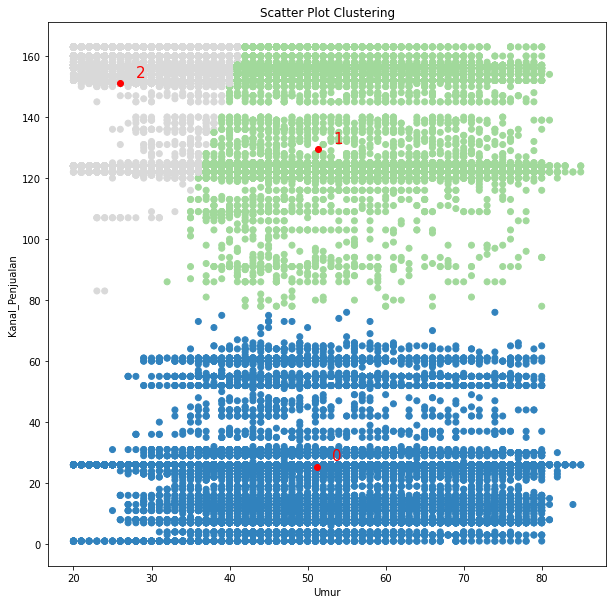

In [113]:
df_processing = df_training.copy()
df_processing = df_processing.filter(items=["id", "Umur", "Kanal_Penjualan"])
df_processing["Cluster"] = data_run_history["k_runs"][3]["cluster"]
df_processing
fig, ax = plt.subplots()
fig.set_size_inches((10,10))
ax.scatter(df_processing["Umur"], df_processing["Kanal_Penjualan"], c=df_processing["Cluster"], cmap="tab20c")
ax.scatter(data_run_history["k_runs"][3]["points"][:, 0], data_run_history["k_runs"][3]["points"][:, 1], color="red")
for i in range(len(data_run_history["k_runs"][3]["points"])):
    ax.text(data_run_history["k_runs"][3]["points"][i, 0]+2, data_run_history["k_runs"][3]["points"][i, 1]+2, str(i), color="red", fontsize = 15)
ax.set_xlabel("Umur")
ax.set_ylabel("Kanal_Penjualan")
ax.set_title("Scatter Plot Clustering")

## **Evaluation Using Elbow Visualization**

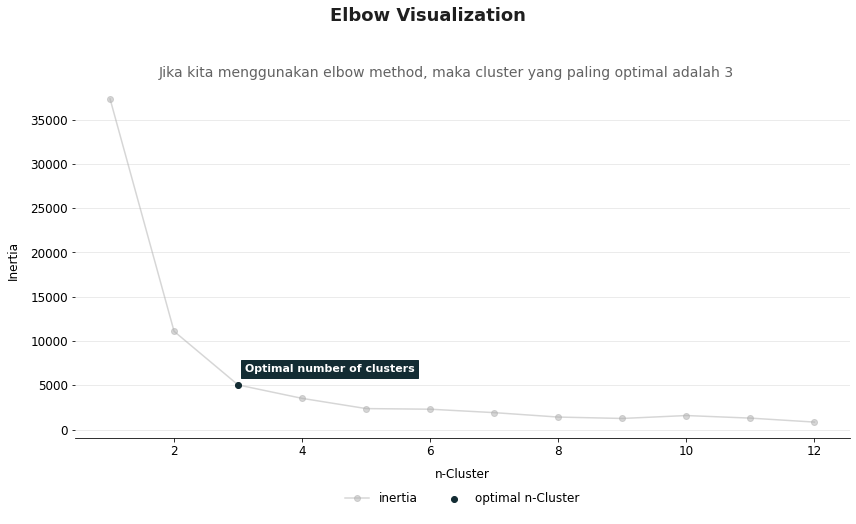

In [123]:
fig, ax = plt.subplots(figsize=(12, 7))

x = [i for i in range(1, 10)]

ax.scatter(x[2], data_run_history['k_runs'][3]['inertia'], color="#132C33", zorder=10)
ax.plot([i for i in data_run_history["k_runs"].keys()], [ data_run_history["k_runs"][i]["inertia"] for i in data_run_history["k_runs"].keys()], marker='o', color='#AEAEAE', alpha=0.5, zorder=0)


ax.legend(["inertia", "optimal n-Cluster"], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, borderpad=1, frameon=False, fontsize=12 )
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.tick_params(labelsize=12)
ax.set_xlabel("n-Cluster", fontsize=12, labelpad=10)
ax.set_ylabel("Inertia", fontsize=12, labelpad=10)

ax.text(
    s="Optimal number of clusters", 
    x=3.1, y=data_run_history['k_runs'][3]['inertia'] + 1500,
    fontsize=11,
    color='white',
    fontweight='bold',
    backgroundcolor="#132C33"    
)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.suptitle("Elbow Visualization", ha='center', va='center', x=0.5, y=1.02, fontsize=18, fontweight='bold', color="#1F1F1F")
plt.title("Jika kita menggunakan elbow method, maka cluster yang paling optimal adalah 3", loc='center', ha='center', x=0.48, y=1, fontsize=14, color='#636363')
plt.tight_layout()
plt.show()

## **Other Experiment**
### **Using Atribute Lama_Berlangganan and Umur**

In [125]:
MAX_K = 12

data_run_history = {
  "data" : "2 Data, Premi dan Kanal_Penjualan", 
  "k_runs" : {}
}

for i in range(1, MAX_K+1):
  print("==== K:", i, "====" )
  run_data = {
    "points" : None,
    "cluster" : None,
    "inertia" : None
  }
  
  model = KMeans(df_training.filter(items=["Premi","Kanal_Penjualan"]))
  run_data["cluster"] = model.fit_predict(k_num=i)
  run_data["inertia"] = model.inertia
  run_data["points"] = model.point
  data_run_history["k_runs"][i] = run_data

==== K: 1 ====
K-Means will be determined by the attributes below:
[ Premi, Kanal_Penjualan ]
STEP: 1, INERTIA: 39863.063256378584
It's convergence!
==== K: 2 ====
K-Means will be determined by the attributes below:
[ Premi, Kanal_Penjualan ]
STEP: 1, INERTIA: 22152.15085837973
STEP: 2, INERTIA: 16943.569021278938
STEP: 3, INERTIA: 16397.092293518577
STEP: 4, INERTIA: 16396.855149764837
It's convergence!
==== K: 3 ====
K-Means will be determined by the attributes below:
[ Premi, Kanal_Penjualan ]
STEP: 1, INERTIA: 13541.750394391489
STEP: 2, INERTIA: 10446.099555097719
STEP: 3, INERTIA: 10192.0092473972
STEP: 4, INERTIA: 10002.266355987655
STEP: 5, INERTIA: 9824.177353089786
STEP: 6, INERTIA: 9665.981265175327
STEP: 7, INERTIA: 9563.684255458216
STEP: 8, INERTIA: 9524.78346277636
STEP: 9, INERTIA: 9516.862388041769
STEP: 10, INERTIA: 9515.773558565095
STEP: 11, INERTIA: 9515.649541784884
STEP: 12, INERTIA: 9515.634693167232
STEP: 13, INERTIA: 9515.630933328854
STEP: 14, INERTIA: 9515.6

Text(0.5, 1.0, 'Scatter Plot Clustering')

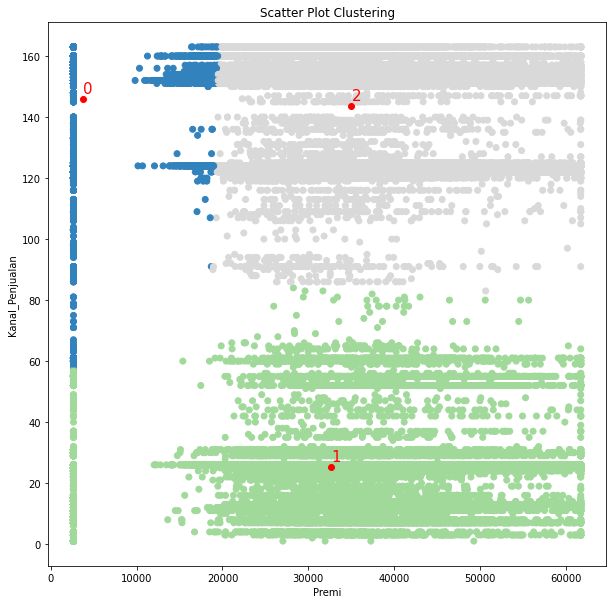

In [129]:
df_processing = df_training.copy()
df_processing = df_processing.filter(items=["id", "Premi", "Kanal_Penjualan"])
df_processing["Cluster"] = data_run_history["k_runs"][3]["cluster"]
df_processing
fig, ax = plt.subplots()
fig.set_size_inches((10,10))
ax.scatter(df_processing["Premi"], df_processing["Kanal_Penjualan"], c=df_processing["Cluster"], cmap="tab20c")
ax.scatter(data_run_history["k_runs"][3]["points"][:, 0], data_run_history["k_runs"][3]["points"][:, 1], color="red")
for i in range(len(data_run_history["k_runs"][3]["points"])):
    ax.text(data_run_history["k_runs"][3]["points"][i, 0]+2, data_run_history["k_runs"][3]["points"][i, 1]+2, str(i), color="red", fontsize = 15)
ax.set_xlabel("Premi")
ax.set_ylabel("Kanal_Penjualan")
ax.set_title("Scatter Plot Clustering")

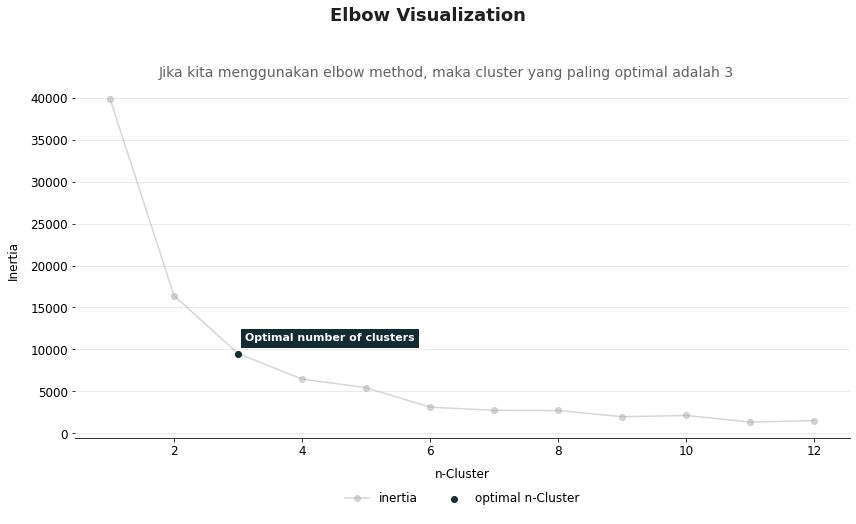

In [127]:
fig, ax = plt.subplots(figsize=(12, 7))

x = [i for i in range(1, 10)]

ax.scatter(x[2], data_run_history['k_runs'][3]['inertia'], color="#132C33", zorder=10)
ax.plot([i for i in data_run_history["k_runs"].keys()], [ data_run_history["k_runs"][i]["inertia"] for i in data_run_history["k_runs"].keys()], marker='o', color='#AEAEAE', alpha=0.5, zorder=0)


ax.legend(["inertia", "optimal n-Cluster"], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, borderpad=1, frameon=False, fontsize=12 )
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.tick_params(labelsize=12)
ax.set_xlabel("n-Cluster", fontsize=12, labelpad=10)
ax.set_ylabel("Inertia", fontsize=12, labelpad=10)

ax.text(
    s="Optimal number of clusters", 
    x=3.1, y=data_run_history['k_runs'][3]['inertia'] + 1500,
    fontsize=11,
    color='white',
    fontweight='bold',
    backgroundcolor="#132C33"    
)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.suptitle("Elbow Visualization", ha='center', va='center', x=0.5, y=1.02, fontsize=18, fontweight='bold', color="#1F1F1F")
plt.title("Jika kita menggunakan elbow method, maka cluster yang paling optimal adalah 3", loc='center', ha='center', x=0.48, y=1, fontsize=14, color='#636363')
plt.tight_layout()
plt.show()